<a href="https://colab.research.google.com/github/JeanMichelDeveloper/Training/blob/main/Convert_sketch_to_photo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load dataset

In [2]:
#import necessary libraries
from google.colab import drive
import os
import keras
from keras_preprocessing import image
import numpy
from keras.layers import Input, Conv2D, Activation, Conv2DTranspose, Flatten, LeakyReLU, Dense
from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras import backend as K
import matplotlib.pyplot as plt

In [3]:
#Access data in google drive
drive._mount('/content/drive')

path_to_train_photos = '/content/drive/MyDrive/train/train_photo/'

path_to_train_sketches = '/content/drive/MyDrive/train/train_sketch/'

path_to_test_photos = '/content/drive/MyDrive/test/test_photo/'

path_to_test_sketches = '/content/drive/MyDrive/test/test_sketch/'

train_photos = [path_to_train_photos+i for i in os.listdir(path_to_train_photos)]

train_sketches = [path_to_train_sketches+i for i in os.listdir(path_to_train_sketches)]

test_photos = [path_to_test_photos+i for i in os.listdir(path_to_test_photos)]

test_sketches = [path_to_test_sketches+i for i in os.listdir(path_to_test_sketches)]

photos = train_photos + test_photos

sketches = train_sketches + test_sketches

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
print(len((photos)))

print(len((sketches)))

188
188


Process photos and sketches

In [5]:
#load photos and sketches and convert to array
sketches_array = []
photos_array = []

for i in range(len((photos))):
  sketch_path = sketches[i]

  loaded_sketch = image.load_img(sketch_path, target_size =(128, 128, 3))

  loaded_sketch = image.img_to_array(loaded_sketch)

  sketches_array.append(loaded_sketch)

  photo_path = photos[i]

  loaded_photo = image.load_img(photo_path, target_size =(128, 128, 3))

  loaded_photo = image.img_to_array(loaded_photo)

  photos_array.append(loaded_photo)

#convert to numpy array
sketches_array = numpy.array(sketches_array).astype('float32')

photos_array = numpy.array(photos_array).astype('float32')

#normalize data
sketches_array = (sketches_array - 127.5) /127.5

photos_array = (photos_array - 127.5) /127.5

Build a generator

In [6]:
def generator():

  input_layer = Input((128, 128, 3))

  conv1_layer = Conv2D(32, (7, 7), strides = (1, 1), padding = "same")(input_layer)
  conv1_layer = BatchNormalization()(conv1_layer)
  conv1_layer = Activation("relu")(conv1_layer)

  conv2_layer = Conv2D(64, (3, 3), strides = (2, 2), padding = "same")(conv1_layer)
  conv2_layer = BatchNormalization()(conv2_layer)
  conv2_layer = Activation("relu")(conv2_layer)

  conv3_layer = Conv2D(128, (3, 3), strides = (2, 2), padding = "same")(conv2_layer)
  conv3_layer = BatchNormalization()(conv3_layer)
  conv3_layer = Activation("relu")(conv3_layer)

  b1 = Conv2D(128, (3, 3), padding = "same")(conv3_layer)
  b1 = BatchNormalization()(b1)
  b1 = Activation("relu")(b1)

  b2 = Conv2D(128, (3, 3), padding = "same")(b1)
  b2 = BatchNormalization()(b2)
  b2 = Activation("relu")(b2)

  block1 = keras.layers.add([b1, b2])

  b1 = Conv2D(128, (3, 3), padding = "same")(block1)
  b1 = BatchNormalization()(b1)
  b1 = Activation("relu")(b1)

  b2 = Conv2D(128, (3, 3), padding = "same")(b1)
  b2 = BatchNormalization()(b2)
  b2 = Activation("relu")(b2)

  block2 = keras.layers.add([b1, b2])

  b1 = Conv2D(128, (3, 3), padding = "same")(block2)
  b1 = BatchNormalization()(b1)
  b1 = Activation("relu")(b1)

  b2 = Conv2D(128, (3, 3), padding = "same")(b1)
  b2 = BatchNormalization()(b2)
  b2 = Activation("relu")(b2)

  block3 = keras.layers.add([b1, b2])

  b1 = Conv2D(128, (3, 3), padding = "same")(block3)
  b1 = BatchNormalization()(b1)
  b1 = Activation("relu")(b1)

  b2 = Conv2D(128, (3, 3), padding = "same")(b1)
  b2 = BatchNormalization()(b2)
  b2 = Activation("relu")(b2)

  block4 = keras.layers.add([b1, b2])

  b1 = Conv2D(128, (3, 3), padding = "same")(block4)
  b1 = BatchNormalization()(b1)
  b1 = Activation("relu")(b1)

  b2 = Conv2D(128, (3, 3), padding = "same")(b1)
  b2 = BatchNormalization()(b2)
  b2 = Activation("relu")(b2)

  block5 = keras.layers.add([b1, b2])

  b1 = Conv2D(128, (3, 3), padding = "same")(block5)
  b1 = BatchNormalization()(b1)
  b1 = Activation("relu")(b1)

  b2 = Conv2D(128, (3, 3), padding = "same")(b1)
  b2 = BatchNormalization()(b2)
  b2 = Activation("relu")(b2)

  block6 = keras.layers.add([b1, b2])

  transpose1 = Conv2DTranspose(64, (3, 3), strides = (2, 2), padding = "same")(block6)
  transpose1 = BatchNormalization()(transpose1)
  transpose1 = Activation("relu")(transpose1)

  transpose2 = Conv2DTranspose(32, (3, 3), strides = (2, 2), padding = "same")(transpose1)
  transpose2 = BatchNormalization()(transpose2)
  transpose2 = Activation("relu")(transpose2)

  conv4_layer = Conv2D(3, (3, 3), strides = (1, 1), padding = "same")(transpose2)
  conv4_layer = BatchNormalization()(conv4_layer)
  conv4_layer = Activation("relu")(conv4_layer)

  return Model(inputs = [input_layer], outputs = [conv4_layer])

generator()             

Build a discriminator

In [7]:
def discriminator():

  input_layer = Input((128, 128, 3))

  conv1_layer = Conv2D(64, (4, 4), strides = (2, 2))(input_layer)
  conv1_layer = Activation(LeakyReLU(alpha = .2))(conv1_layer)

  conv2_layer = Conv2D(128, (4, 4), strides = (2, 2))(conv1_layer)
  conv2_layer = BatchNormalization()(conv2_layer)
  conv2_layer = Activation(LeakyReLU(alpha = .2))(conv2_layer)

  conv3_layer = Conv2D(256, (4, 4), strides = (2, 2))(conv2_layer)
  conv3_layer = BatchNormalization()(conv3_layer)
  conv3_layer = Activation(LeakyReLU(alpha = .2))(conv3_layer)

  conv4_layer = Conv2D(512, (4, 4), strides = (2, 2))(conv3_layer)
  conv4_layer = BatchNormalization()(conv4_layer)
  conv4_layer = Activation(LeakyReLU(alpha = .2))(conv4_layer)

  output_layer = Flatten()(conv4_layer)
  output_layer = Dense(1, activation = "sigmoid")(output_layer)

  return Model(inputs = [input_layer], outputs = [output_layer])

discriminator()

Build a combined model

In [8]:
def combined_model(generator, discriminator):
  input_layer = Input((128, 128, 3))

  generator_outputs = generator(input_layer)

  discriminator.trainable = False

  discriminator_outputs = discriminator(generator_outputs)

  return Model(inputs = input_layer, outputs = [generator_outputs, discriminator_outputs])

Define loss and optimizer

In [9]:
#define optimizer
optimizer = keras.optimizers.Adam(lr = 0.0002,
                                 beta_1 = 0.9,
                                 beta_2 = 0.999,
                                 epsilon = 1e-8,
                                 decay = 0.0)

#create model
generator_model = generator()
discriminator_model = discriminator()
model = combined_model(generator_model, discriminator_model)

#define losses
def mean_squared_error(actual_y, predicted_y):
  return 10 * K.mean(K.square(predicted_y - actual_y), axis = -1)

def discriminator_on_generator_loss(actual_y, predicted_y):
  return K.mean(K.binary_crossentropy(K.flatten(predicted_y), K.ones_like(K.flatten(predicted_y))), axis = -1)

def discriminator_loss(actual_y, predicted_y):
  batch_size = 30

  return K.mean(K.binary_crossentropy(K.flatten(predicted_y),
                                      K.concatenate([K.ones_like(K.flatten(predicted_y[:batch_size])),
                                                     K.zeros_like(K.flatten(predicted_y[:batch_size]))])), 
                axis = -1)

#Compile models
generator_model.compile(loss=mean_squared_error, optimizer = optimizer)

discriminator_model.compile(loss=discriminator_loss, optimizer = optimizer)

model.compile(loss = [mean_squared_error, discriminator_on_generator_loss], optimizer = optimizer)

discriminator_model.trainable = True

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Build a training epoch

In [10]:
epochs = 1000
batch_size = 30

for epoch in range(epochs):
  generator_model.optimizer.lr.assign(0.0002 * 1 / (1 + 0.001 * epoch))
  discriminator_model.optimizer.lr.assign(0.0002 * 1 / (1 + 0.001 * epoch))

  for batch in range(sketches_array.shape[0] // batch_size):
    X = sketches_array[batch * batch_size:(batch + 1) * batch_size]
    Y = photos_array[batch * batch_size:(batch + 1) * batch_size]

    fake_photos = generator_model.predict(X, verbose = 0)

    discriminator_Y = [1] * batch_size + [0] * batch_size

    discriminator_X = numpy.concatenate((Y, fake_photos), axis = 0)

    discriminator_X = discriminator_X * 127.5 + 127.5

    discriminator_Y = numpy.array(discriminator_Y)

    discriminator_model.trainable = True

    for index in range(1):
      discriminator_loss = discriminator_model.train_on_batch(discriminator_X,
                                                              discriminator_Y)
      
    discriminator_model.trainable = False

    for index in range(1):
      y_label = discriminator_Y[:batch_size]

      generator_loss = model.train_on_batch(X, [Y, y_label])
    
    discriminator_model.trainable = True

    print("Epoch : %d" %epoch)
    print("\tBatch %d generator_loss: %f, %f discriminator_loss %f" %(batch,
                                                                      generator_loss[0],
                                                                      generator_loss[1],
                                                                      discriminator_loss))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Epoch : 583
	Batch 2 generator_loss: 2.646279, 1.910265 discriminator_loss 12.546472
Epoch : 583
	Batch 3 generator_loss: 2.694869, 1.937873 discriminator_loss 13.361584
Epoch : 583
	Batch 4 generator_loss: 2.663600, 1.900901 discriminator_loss 12.327099
Epoch : 583
	Batch 5 generator_loss: 2.755927, 1.964566 discriminator_loss 12.696557
Epoch : 584
	Batch 0 generator_loss: 2.582813, 1.843124 discriminator_loss 12.212513
Epoch : 584
	Batch 1 generator_loss: 2.474480, 1.757047 discriminator_loss 13.011866
Epoch : 584
	Batch 2 generator_loss: 2.647828, 1.902482 discriminator_loss 12.546472
Epoch : 584
	Batch 3 generator_loss: 2.724572, 1.941581 discriminator_loss 13.361584
Epoch : 584
	Batch 4 generator_loss: 2.654814, 1.912102 discriminator_loss 12.327099
Epoch : 584
	Batch 5 generator_loss: 2.734876, 1.983559 discriminator_loss 12.696557
Epoch : 585
	Batch 0 generator_loss: 2.604261, 1.852759 discriminator_lo

Test the model

1/1 [==============================] - 0s 20ms/step


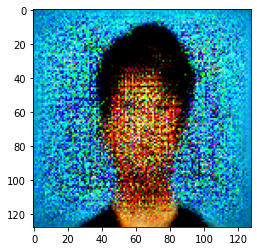

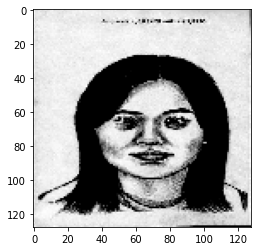

In [12]:
test_path = '/content/drive/MyDrive/test/test_sketch/f1-014-01-sz1.jpg'

test_image = image.load_img(test_path, target_size = (128, 128, 3))

test_image = image.img_to_array(test_image).astype(numpy.float32)

test_image = (test_image - 127.5) / 127.5

zeros_array = numpy.zeros((1, 128, 128, 3))

zeros_array[0] = test_image.astype(numpy.float32)

result_photo = generator_model.predict(zeros_array)

plt.imshow(result_photo[0])
plt.show()

plt.imshow(test_image)
plt.show()